In [131]:
# imports
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

from utils.basic_utils import *
from utils.pricing import *
from utils.imports import *
from utils.structured import *

import matplotlib.pyplot as plt
from IPython.display import display

In [132]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [133]:
# PATH = './'
# !ls {PATH}

### Get universe pricing

In [134]:
risk_symbol = '^VIX'
bench_symbol = '^GSPC'

In [143]:
# currSL.append('DX-Y.NYB') # temp workaround until next px refresh on Monday

In [147]:
# Load pricing, refresh once
benchSL, sectorSL, riskSL, rateSL, bondSL, commSL, currSL = \
    config['benchmarks'], config['sectors'], config['risk'], config['rates'], \
    config['bonds'],config['commodities'], config['currencies']
symbols_list = benchSL + sectorSL + riskSL + rateSL + bondSL + commSL + currSL
f'Total securities {len(symbols_list)}: {symbols_list}'

"Total securities 60: ['^DJI', '^IXIC', '^GSPC', '^RUT', 'SPY', 'QQQ', 'DIA', 'IWM', 'IJR', 'IJH', 'FXI', 'EEM', 'XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV', 'XLY', '^VIX', '^IRX', '^FVX', '^TNX', '^TYX', 'BND', 'BNDX', 'EMB', 'GOVT', 'HYG', 'IEF', 'JNK', 'LQD', 'MUB', 'SHY', 'TIP', 'TLT', 'QYLD', 'GC=F', 'SI=F', 'HG=F', 'CL=F', 'NG=F', 'BZ=F', 'EURUSD=X', 'JPY=X', 'GBPUSD=X', 'CNY=X', 'HKD=X', 'MXN=X', 'AUDUSD=X', 'NZDUSD=X', 'TWD=X', 'CHF=X', 'CLP=X', 'KRW=X', 'DX-Y.NYB']"

In [ ]:
# Retrieves daily pricing for list of symbols
%time [get_pricing(s, '1d', '30y') for s in symbols_list];

In [148]:
%time px_close = get_mults_pricing(symbols_list, freq, 'close');

Retrieved pricing for ^DJI
Retrieved pricing for ^IXIC
Retrieved pricing for ^GSPC
Retrieved pricing for ^RUT
Retrieved pricing for SPY
Retrieved pricing for QQQ
Retrieved pricing for DIA
Retrieved pricing for IWM
Retrieved pricing for IJR
Retrieved pricing for IJH
Retrieved pricing for FXI
Retrieved pricing for EEM
Retrieved pricing for XLB
Retrieved pricing for XLC
Retrieved pricing for XLE
Retrieved pricing for XLF
Retrieved pricing for XLI
Retrieved pricing for XLK
Retrieved pricing for XLP
Retrieved pricing for XLRE
Retrieved pricing for XLU
Retrieved pricing for XLV
Retrieved pricing for XLY
Retrieved pricing for ^VIX
Retrieved pricing for ^IRX
Retrieved pricing for ^FVX
Retrieved pricing for ^TNX
Retrieved pricing for ^TYX
Retrieved pricing for BND
Retrieved pricing for BNDX
Retrieved pricing for EMB
Retrieved pricing for GOVT
Retrieved pricing for HYG
Retrieved pricing for IEF
Retrieved pricing for JNK
Retrieved pricing for LQD
Retrieved pricing for MUB
Retrieved pricing for SH

Given the date range of key series currently working only with:
- Benchmarks: DOW, Nasdaq, SPY, and Russell 2000
- Sectors ETFs (excluding benchmarks)
- Rates: 2, 5, 10, and 30 year treasuries
- Risk: VIX
- Hard currencies (JPY, EUR, GBP and Dollar Index DXY)
- Corporate Bonds: Investment Grade (LQD), High Yield (JNK and HYG)

Ideally would like to go back further are include:
- Commodities price change
- Yields Spreads from Corporate Spreads

In [149]:
def excl(a, b): return list(set(a).difference(b))
keep_sect = excl(sectorSL, ['SPY', 'QQQ', 'DIA', 'IWM', 'XLC', 'XLRE'])
keep_curr = excl(currSL, ['HKD=X', 'MXN=X', 'AUDUSD=X', 'NZDUSD=X', 'TWD=X', 'CLP=X', 'KRW=X'])
keep_bonds = ['LQD', 'HYG', 'JNK']

In [150]:
to_keep = benchSL + keep_sect + rateSL + riskSL + keep_curr + keep_bonds
px_close[to_keep].describe().T.sort_values(by='count')

,count,mean,std,min,25%,50%,75%,max
DX-Y.NYB,2355.0,85.457822,8.303297,71.330002,79.410004,82.309998,94.450001,103.290001
JNK,2829.0,38.242467,3.303818,25.850000,36.230000,38.619999,40.310001,48.060001
HYG,2994.0,88.772298,6.720135,61.639999,85.739998,88.690002,92.517498,106.089996
EURUSD=X,3044.0,1.275895,0.118290,1.039047,1.185691,1.281641,1.355735,1.598798
GBPUSD=X,3055.0,1.622195,0.214958,1.215732,1.491458,1.599207,1.792307,2.108192
CHF=X,3095.0,1.052945,0.134391,0.722800,0.951800,0.999710,1.181400,1.385800
CNY=X,3562.0,7.120520,0.809332,6.031200,6.380350,6.821400,8.074875,8.277900
FXI,3623.0,37.270006,8.884074,16.866671,33.655001,38.160000,42.470001,72.836670
EEM,3998.0,36.507688,9.440345,11.222222,32.130835,39.360001,43.000000,55.730000
LQD,4176.0,111.576489,6.880317,81.699997,106.750000,111.779999,116.739998,124.400002


In [13]:
# OLD: Retrieves historical pricing
secpx = get_symbol_pricing('^VIX')
secpx.rename(columns={'close': risk_symbol}, inplace=True)
secpx.drop(columns=['volume'], inplace=True)
secpx.set_index(secpx.index.astype(np.datetime64), inplace=True)

closepx = secpx[risk_symbol]
openpx = secpx['open']
lowpx = secpx['low']
highpx = secpx['high']

closepx_1d_shift = closepx.shift(1)
pct_chg = closepx.pct_change()

SPY = get_symbol_pricing('^GSPC', freq) # SPY pricing
SPY.set_index(SPY.index.astype(np.datetime64), inplace=True)

secpx[bench_symbol] = SPY['close']
SPY_close = secpx[bench_symbol]
SPY_pct_chg = secpx[bench_symbol].pct_change()

### Feature construction

In [151]:
# FX
FX = ['EURUSD=X', 'JPY=X', 'GBPUSD=X', 'CNY=X', 'CHF=X', 'DX-Y.NYB']
invert = ['EURUSD=X', 'GBPUSD=X']
df_raw = px_close[FX]
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
EURUSD=X,3044.0,1.275895,0.118290,1.039047,1.185691,1.281641,1.355735,1.598798
JPY=X,4460.0,108.566220,14.041281,75.930000,101.899750,110.539001,118.632498,147.220001
GBPUSD=X,3055.0,1.622195,0.214958,1.215732,1.491458,1.599207,1.792307,2.108192
CNY=X,3562.0,7.120520,0.809332,6.031200,6.380350,6.821400,8.074875,8.277900
CHF=X,3095.0,1.052945,0.134391,0.722800,0.951800,0.999710,1.181400,1.385800
DX-Y.NYB,2355.0,85.457822,8.303297,71.330002,79.410004,82.309998,94.450001,103.290001


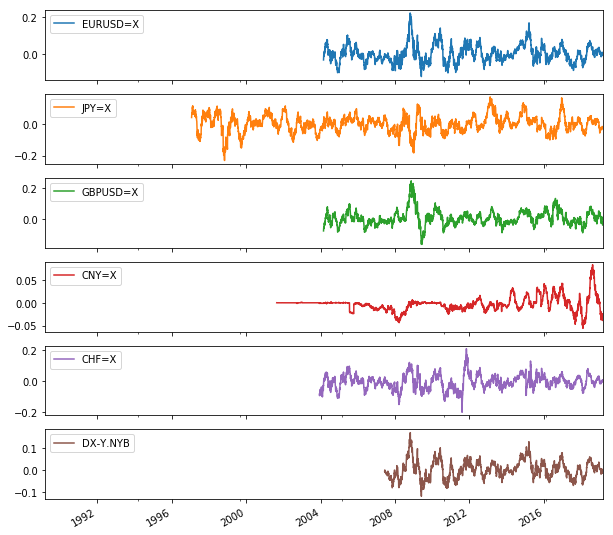

In [153]:
fx_df = df_raw.copy()
fx_df[invert] = (1 / df_raw[invert])
fx_df.tail(60)
fx_chg_df = fx_df.pct_change().rolling(60).sum()
fx_chg_df.plot(subplots=True, figsize=(10,10));

In [506]:
%%time
# Rates
def rate_feats(df, rolls=[60]):
    ndf = pd.DataFrame()
    ndf[df.columns] = df
    # bps daily change
#     bps_chg = (df - df.shift(1))
#     ndf[[x + 'BpsChg' for x in df.columns]] = bps_chg
    # bps rolling change
#     for r in rolls:
#         cum_bps_chg = (df - df.shift(1)).rolling(r).sum()
#         ndf[[x + 'BpsChg' + str(r) for x in df.columns]] = cum_bps_chg
    # term structure spreads
#     ts_prem = (df - df.shift(1, axis=1))
#     ndf[[x + 'TSPrem' for x in df.columns[1:]]] = ts_prem.iloc[:, 1:]
    # 3m vs. 10yr spread
    ndf['slRateSpread'] = (rates[rates.columns[-2]] - rates[rates.columns[0]])
    return ndf

CPU times: user 7 µs, sys: 3 µs, total: 10 µs
Wall time: 15.7 µs


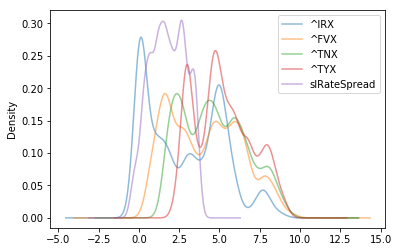

In [508]:
rates = px_close[rateSL]
rate_feats(rates, [60]).plot.kde(alpha=0.5)

In [509]:
# Generic price momentum
def px_mom_feats(df, s, stds=1, invert=False, incl_px=False, rolls=[20,60,120]):
    ndf = pd.DataFrame()
    if invert: df = 1 / df
    c, o, l, h = df['close'], df['open'], df['low'], df['high']
    c1ds, pctChg = c.shift(1), c.pct_change()
    if incl_px: ndf[s + 'Close'] = c
    ndf[s+'PctChg'+str(stds)+'Stds'] = pctChg.apply(
        sign_compare, args=(pctChg.std() * stds,))
    ndf[s+'RollVol20'] = roll_vol(pctChg, 20)
    for p in rolls: ndf[s+'PctChg'+str(p)] = c.pct_change(periods=p)
#     ndf[s+'OpenGap20'] = ((o - c1ds) / c1ds).rolling(20).sum()
#     ndf[s+'HLDelta20'] = ((h - l) / c1ds).rolling(20).sum()
    ndf[s+'Pct52WkH'] = (c / c.rolling(252).max())
    ndf[s+'Pct52WkL'] = (c / c.rolling(252).min())
    return ndf

CPU times: user 1.06 s, sys: 16.8 ms, total: 1.07 s
Wall time: 1.6 s


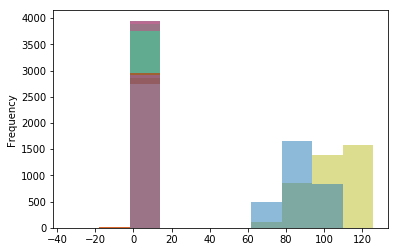

In [512]:
%%time
# Uses px_mom_feats for FX transforms
FX = ['EURUSD=X', 'JPY=X', 'GBPUSD=X', 'CNY=X', 'CHF=X', 'DX-Y.NYB']
invert = ['EURUSD=X', 'GBPUSD=X']

ndf = pd.DataFrame() 
for fx in FX:
    inv = True if fx in invert else False
    df = get_symbol_pricing(fx)
    ft_df = px_mom_feats(df, fx, 1, inv, True)
    ndf[ft_df.columns] = ft_df
ndf.plot.hist(alpha=0.5, legend=False)

In [513]:
ft_df = px_mom_feats(get_symbol_pricing('^VIX'), '^VIX', 2, False, True, [20])
ft_df.columns

Index(['^VIXClose', '^VIXPctChg2Stds', '^VIXRollVol20', '^VIXPctChg20',
       '^VIXPct52WkH', '^VIXPct52WkL'],
      dtype='object')

In [514]:
# Forward returns
def px_fwd_rets(df, s, periods=[20, 60, 120]):
    ndf = pd.DataFrame() 
    for p in periods: 
        ndf[s + 'FwdPctChg' + str(p)] = df['close'].pct_change(p).shift(-p)
    return ndf

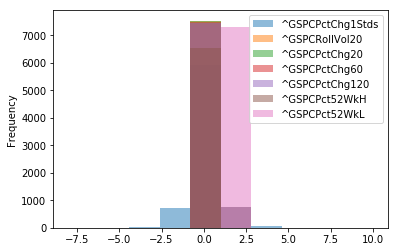

In [515]:
symbol = '^GSPC'
px_df = get_symbol_pricing(symbol)

ft_df = px_mom_feats(px_df, symbol)
# ft_df.plot(subplots=True, figsize=(10,15));
ft_df.plot.hist(alpha=0.5);

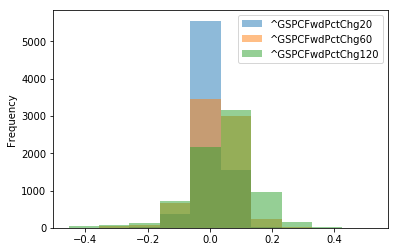

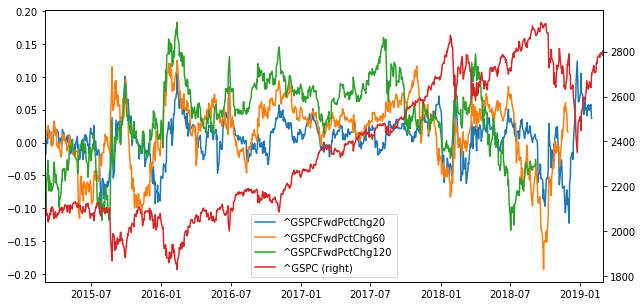

In [516]:
ft_df = px_fwd_rets(px_df, symbol)
ft_df.plot.hist(alpha=0.5);
ft_df[symbol] = px_df['close']
ft_df.tail(252*4).plot(secondary_y=symbol, figsize=(10,5));

In [517]:
%%time
# calculates forward returns for all bechmarks
fwd_rets_df = pd.DataFrame()
for s in benchSL:
    px_df = get_symbol_pricing(s)
    fwd_ret = px_fwd_rets(px_df, s)
    fwd_rets_df[fwd_ret.columns] = fwd_ret
fwd_rets_df.tail()

CPU times: user 269 ms, sys: 9.41 ms, total: 278 ms
Wall time: 666 ms


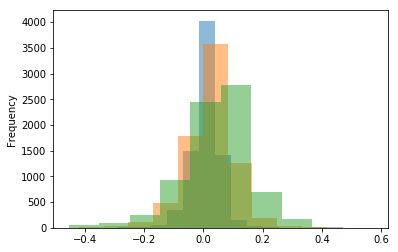

In [518]:
# average different time frames of fwd rets for all benchmarks
# do we try to estimate the average of all benchmarks or just one?
# do we try to estimate three type of fwd rets [20, 60, 120] or just one?
[fwd_rets_df[[x for x in fwd_rets_df.columns if y in x]].mean(axis=1).plot.hist(alpha=0.5)
     for y in ['g20', 'g60', 'g120']]

### Pre-processing

Y, dependent variable: Forward 3M returns for SPY

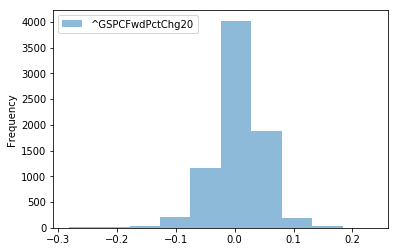

In [519]:
bench = '^GSPC'
px_df = get_symbol_pricing(bench)
Y = fwd_ret = px_fwd_rets(px_df, bench, [20])
Y.plot.hist(alpha=0.5)

X, independent variables
1. Price momentum transforms for: Benchmarks, Select Sectors, Risk, Bond ETFs (px mom)
2. Treasury transforms
3. Currency transforms

Pending: Options, commodities, and corporate bond datasets

In [520]:
%time
df_raw = pd.DataFrame()

# FX = ['EURUSD=X', 'JPY=X', 'GBPUSD=X', 'CNY=X', 'CHF=X', 'DX-Y.NYB']
# include = benchSL + keep_sect + rateSL + riskSL + FX + keep_bonds
keep_rates = ['^IRX', '^TNX']
include = ['^GSPC'] + keep_rates + riskSL
FX = ['EURUSD=X', 'JPY=X', 'GBPUSD=X', 'CNY=X', 'DX-Y.NYB']
invert = ['EURUSD=X', 'GBPUSD=X']
incl_price = riskSL

# rate transforms
rate_ft_df = rate_feats(px_close[keep_rates], [20])
df_raw[rate_ft_df.columns] = rate_ft_df

# price momentum transforms
for ticker in include:
    inv = True if ticker in invert else False
    incl_px = True if ticker in incl_price else False
    df = get_symbol_pricing(ticker)
    ft_df = px_mom_feats(df, ticker, 1, inv, incl_px, [20])
    df_raw[ft_df.columns] = ft_df
    
df_raw[Y.columns] = Y
df_raw.dropna(subset=Y.columns, inplace=True)

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 13.1 µs


In [521]:
df_raw.reset_index(inplace=True)
df_raw.rename({'index': 'obsDate'}, axis=1, inplace=True)

In [522]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
obsDate,7538,7538,2003-01-10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
^IRX,7508,NaN,NaN,NaN,2.86052,2.38591,0.003,0.268,2.9,4.95,9.1
^TNX,7508,NaN,NaN,NaN,4.6777,1.98423,1.366,2.883,4.5585,6.128,9.53
slRateSpread,7508,NaN,NaN,NaN,1.81718,1.08571,-0.763,0.95475,1.8065,2.70925,3.94
^GSPCPctChg1Stds,7538,NaN,NaN,NaN,0.000795967,0.750569,-8,0,0,0,10
^GSPCRollVol20,7518,NaN,NaN,NaN,0.150919,0.0906212,0.0328848,0.0947533,0.127439,0.179927,0.860299
^GSPCPctChg20,7518,NaN,NaN,NaN,0.00673779,0.042114,-0.281601,-0.0147083,0.0107318,0.0306866,0.234949
^GSPCPct52WkH,7287,NaN,NaN,NaN,0.940425,0.085707,0.474215,0.931204,0.974818,0.993174,1
^GSPCPct52WkL,7287,NaN,NaN,NaN,1.19044,0.11644,1,1.11269,1.16882,1.25393,1.70019
^IRXPctChg1Stds,7508,NaN,NaN,NaN,0.0660629,0.923707,-2,0,0,0,33


In [537]:
??add_datepart

In [538]:
add_datepart(df_raw, 'obsDate')
df_raw[[x for x in df_raw.columns if 'obs' in x]].head()

KeyError: 'obsDate'

In [539]:
train_cats(df_raw)

In [540]:
display_all(df_raw.isnull().sum().sort_values(ascending=False)/len(df_raw))

^VIXPct52WkH           0.061157
^VIXPct52WkL           0.061157
^IRXPct52WkL           0.037278
^IRXPct52WkH           0.037278
^TNXPct52WkL           0.037278
^TNXPct52WkH           0.037278
^GSPCPct52WkL          0.033298
^GSPCPct52WkH          0.033298
^VIXPctChg20           0.030512
^VIXRollVol20          0.030512
^VIXPctChg1Stds        0.027859
^VIXClose              0.027859
^IRXRollVol20          0.006633
^IRXPctChg20           0.006633
^TNXRollVol20          0.006633
^TNXPctChg20           0.006633
^IRXPctChg1Stds        0.003980
^TNXPctChg1Stds        0.003980
slRateSpread           0.003980
^TNX                   0.003980
^IRX                   0.003980
^GSPCRollVol20         0.002653
^GSPCPctChg20          0.002653
obsIs_year_start       0.000000
obsIs_month_start      0.000000
obsIs_year_end         0.000000
obsIs_quarter_start    0.000000
^GSPCPctChg1Stds       0.000000
obsIs_quarter_end      0.000000
obsIs_month_end        0.000000
^GSPCFwdPctChg20       0.000000
obsDayof

In [541]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/macro-vix-raw')

In [542]:
df_raw = pd.read_feather('tmp/macro-vix-raw')

### Local training using RandomForest

In [543]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics

In [544]:
y_col = Y.columns[0]
df, y, nas = proc_df(df_raw, y_col)

In [545]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 1500
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

[x.reset_index(drop=True, inplace=True) for x in (X_train, X_valid)]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((6038, 60), (6038,), (1500, 60), (1500,))

In [546]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [547]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/Users/vveiga/miniconda3/envs/inception/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 2.88 s, sys: 17.5 ms, total: 2.9 s
Wall time: 453 ms
[0.008075379291485071, 0.05087083379770945, 0.9669892121341045, -1.6720680088877977]


In [548]:
df_trn, y_trn, nas = proc_df(df_raw, y_col, subset=3000, na_dict=nas)
X_train, _ = split_vals(df_trn, 2000)
y_train, _ = split_vals(y_trn, 2000)

In [549]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/Users/vveiga/miniconda3/envs/inception/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 725 ms, sys: 5.99 ms, total: 731 ms
Wall time: 120 ms
[0.010219038065712805, 0.10529742223055547, 0.941876603359006, -10.4484126369837]


In [550]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.037345740399564877, 0.08631660962587084, 0.22372946832708285, -6.693049782568524]


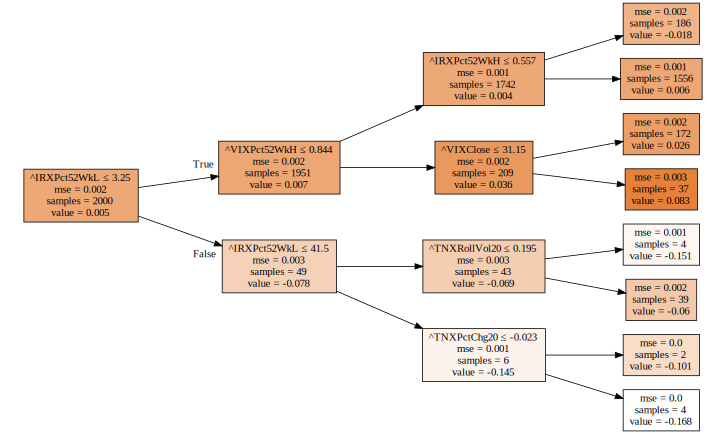

In [551]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [552]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[8.404081316729202e-05, 0.10836092741194465, 0.999996068923966, -11.124259471780757]


Intro to bagging

In [553]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

/Users/vveiga/miniconda3/envs/inception/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.009960725158248591, 0.09555600712567078, 0.9447779066188016, -8.428134812517959]


In [554]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([-0.03078, -0.11288, -0.0959 , -0.13873, -0.0959 , -0.06706, -0.08708, -0.08935, -0.13873, -0.15143]),
 -0.10078228195124943,
 0.021259473804268625)

In [555]:
preds.shape

(10, 1500)

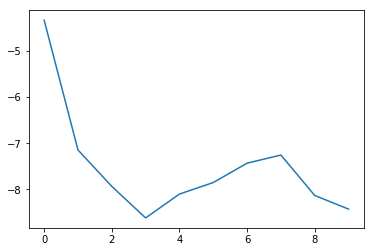

In [556]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [557]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.008785741752188507, 0.0992134673131848, 0.9570376707549246, -9.16368158692723]


In [558]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.008410895619408077, 0.0951075285212332, 0.9606254649268916, -8.339843257298003]


In [559]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.008146398532455325, 0.09745134828760062, 0.9630629457622603, -8.805855742312543]


In [560]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.008469978174773019, 0.09898349116273605, 0.9600703471366715, -9.116617506108987, 0.721883732651637]


In [561]:
df_trn, y_trn, nas = proc_df(df_raw, y_col)
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [562]:
set_rf_samples(2000)

In [563]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

/Users/vveiga/miniconda3/envs/inception/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1.19 s, sys: 10.8 ms, total: 1.2 s
Wall time: 263 ms
[0.0171889372034324, 0.047333613739984355, 0.850435652696103, -1.3133914195879233, 0.715356428515416]


In [564]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.01530855326084569, 0.047318899339462435, 0.881368962347338, -1.311953334714997, 0.7737874828245228]


In [565]:
reset_rf_samples()

In [566]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [567]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.0065613689603513286, 0.0492151001136957, 0.9782069031099884, -1.5009588227559034, 0.8486800986410882]


In [568]:
t=m.estimators_[0].tree_

In [569]:
dectree_max_depth(t)

35

In [570]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.011220337875109634, 0.04972345254738012, 0.9362702962070821, -1.5528914454108222, 0.8249992333340501]


In [571]:
t=m.estimators_[0].tree_

In [572]:
dectree_max_depth(t)

24

In [573]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.008918830532293432, 0.050079008880220155, 0.9597333171635369, -1.5895317829854956, 0.8444331537670282]


In [574]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.009173904577661901, 0.047613808372944245, 0.9573971682375992, -1.340861048061658, 0.8419883593732199]


Confidence based on tree variance

In [575]:
set_rf_samples(3500)

In [576]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.012840885405203907, 0.04444607701665836, 0.9165320070632347, -1.0397486975891836, 0.8103699183346775]


In [577]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 334 ms, sys: 2.13 ms, total: 337 ms
Wall time: 335 ms


(0.02275075243451145, 0.016353181061558367)

In [578]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 66.1 ms, sys: 79.2 ms, total: 145 ms
Wall time: 192 ms


(0.02275075243451145, 0.016353181061558367)

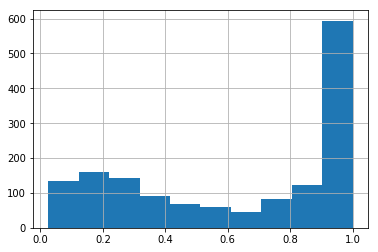

In [579]:
feat_col = '^IRXPct52WkH'
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x[feat_col].hist()

In [580]:
flds = [feat_col, y_col, 'pred', 'pred_std']
enc_summ = x[flds].groupby(feat_col, as_index=False).mean()
enc_summ

,^IRXPct52WkH,^GSPCFwdPctChg20,pred,pred_std
0,0.025000,0.019412,-0.022097,0.052596
1,0.030612,0.030871,-0.081725,0.064760
2,0.032609,-0.017637,-0.031419,0.047386
3,0.037500,0.013410,-0.024172,0.047771
4,0.041667,0.013046,-0.017316,0.040698
5,0.041667,-0.006809,-0.063131,0.045663
6,0.051020,0.037043,-0.068987,0.059301
7,0.054348,0.034025,-0.000083,0.051579
8,0.054545,-0.001261,-0.051769,0.062150
9,0.057692,-0.016221,0.003238,0.043711


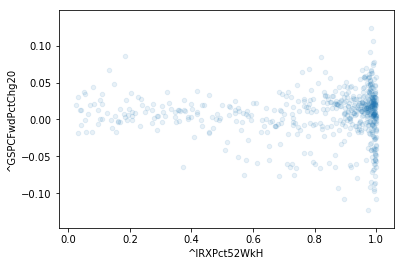

In [581]:
enc_summ = enc_summ[~pd.isnull(enc_summ[y_col])]
enc_summ.plot(feat_col, y_col, 'scatter', alpha=0.1);

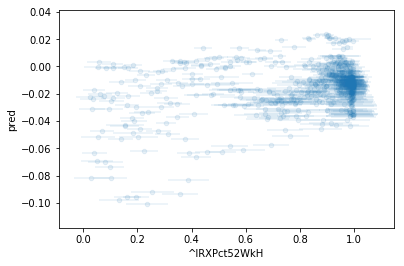

In [582]:
enc_summ.plot(feat_col, 'pred', 'scatter', xerr='pred_std', alpha=0.1);

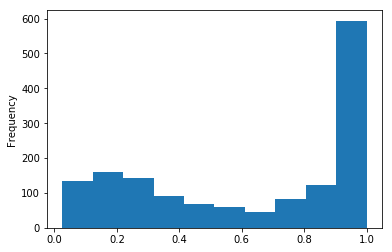

In [583]:
raw_valid[feat_col].plot.hist();

In [584]:
flds = [feat_col, y_col, 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,^GSPCFwdPctChg20,pred,pred_std
^IRXPct52WkH,,,
0.025000,0.019412,-0.022097,0.052596
0.030612,0.030871,-0.081725,0.064760
0.032609,-0.017637,-0.031419,0.047386
0.037500,0.013410,-0.024172,0.047771
0.041667,0.013046,-0.017316,0.040698
0.041667,-0.006809,-0.063131,0.045663
0.051020,0.037043,-0.068987,0.059301
0.054348,0.034025,-0.000083,0.051579
0.054545,-0.001261,-0.051769,0.062150


In [585]:
(summ.pred_std/summ.pred).sort_values(ascending=False)

^IRXPct52WkH
0.691667      371.336980
0.819820      225.633494
0.543478      134.030296
0.846939       87.493708
0.944030       67.010851
0.939577       61.221681
0.891304       60.014752
0.974824       50.178235
0.930931       40.350943
0.183333       40.295763
0.434783       39.015720
0.816327       35.340114
0.961759       28.415403
0.977570       26.336396
0.866667       20.972843
0.904398       20.468011
0.990476       19.875434
0.467391       19.794817
0.108696       19.177712
0.916667       16.784588
0.380435       15.195671
0.942639       14.745467
0.970068       14.640420
0.057692       13.499015
0.946463       12.998525
0.358696       12.372483
0.833333       12.332301
0.600000       11.865971
0.373333       11.711194
0.933078       11.229526
                ...     
0.954861      -19.660129
0.997748      -20.288622
0.994401      -20.883455
0.941739      -20.929414
0.489130      -21.070473
0.954722      -21.992509
0.867347      -22.045854
0.525000      -25.157457
0.333333    

Feature importance

In [586]:
fi = rf_feat_importance(m, df_trn); fi[:40]

,cols,imp
36,obsElapsed,0.093706
9,^IRXRollVol20,0.088724
6,^GSPCPct52WkH,0.087174
11,^IRXPct52WkH,0.052938
12,^IRXPct52WkL,0.047023
29,obsDayofyear,0.043696
20,^VIXRollVol20,0.042954
7,^GSPCPct52WkL,0.042221
18,^VIXClose,0.041396
1,^TNX,0.038867


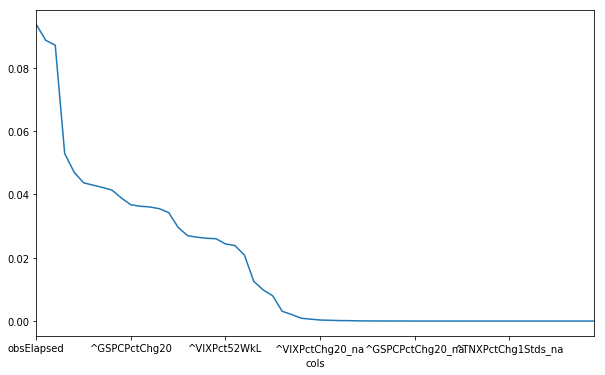

In [587]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [588]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(15,10), legend=False)

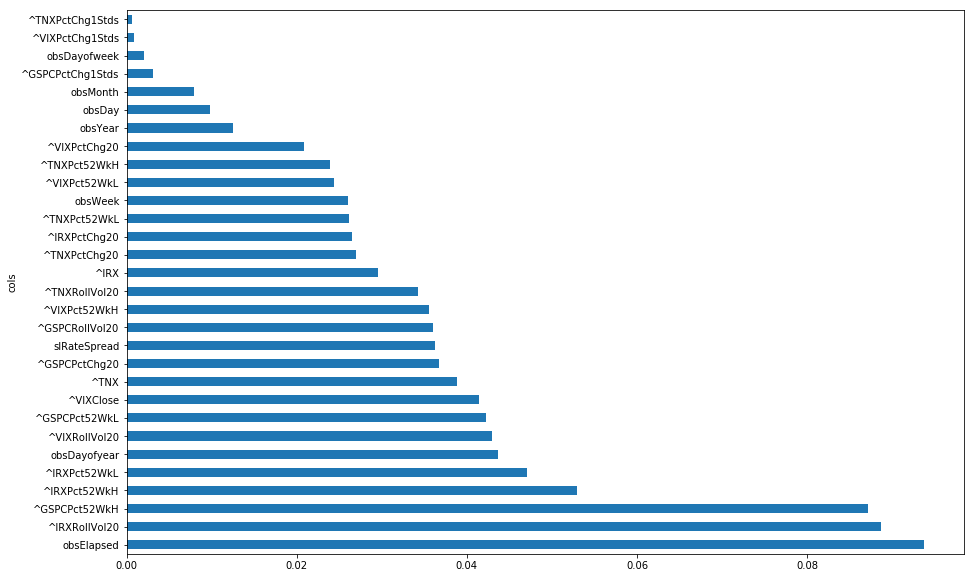

In [589]:
plot_fi(fi[:30]);

In [590]:
to_keep = fi[fi.imp>0.016].cols; len(to_keep)

23

In [591]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [592]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.0126964128474256, 0.042391058147442, 0.9183996349090168, -0.8554886849079882, 0.8148881835855888]


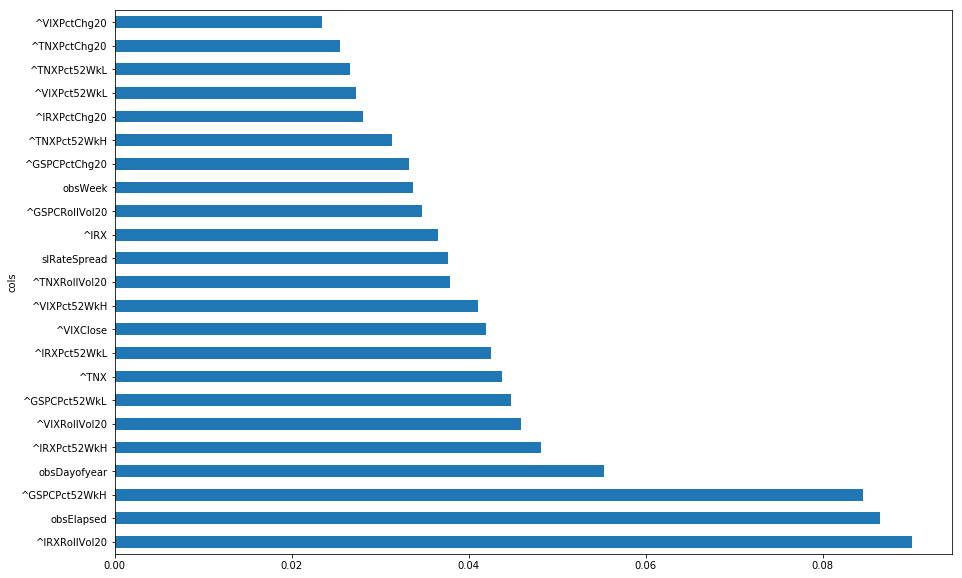

In [593]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

One-hot enconding

In [594]:
df_trn2, y_trn, nas = proc_df(df_raw, y_col, max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.012476594056348005, 0.048695500968950756, 0.9212007434651923, -1.448428757556095, 0.8189340679733823]


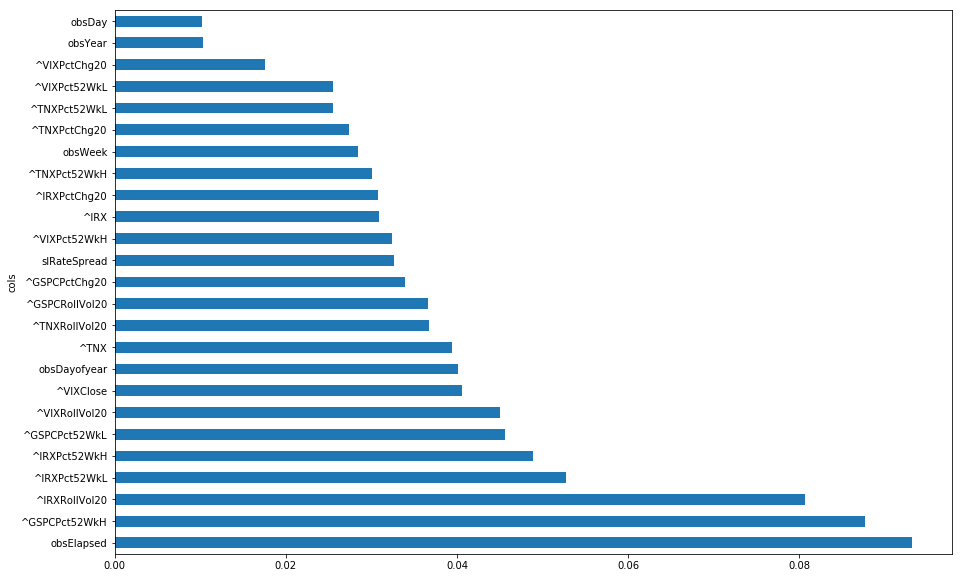

In [595]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25]);

In [596]:
from scipy.cluster import hierarchy as hc

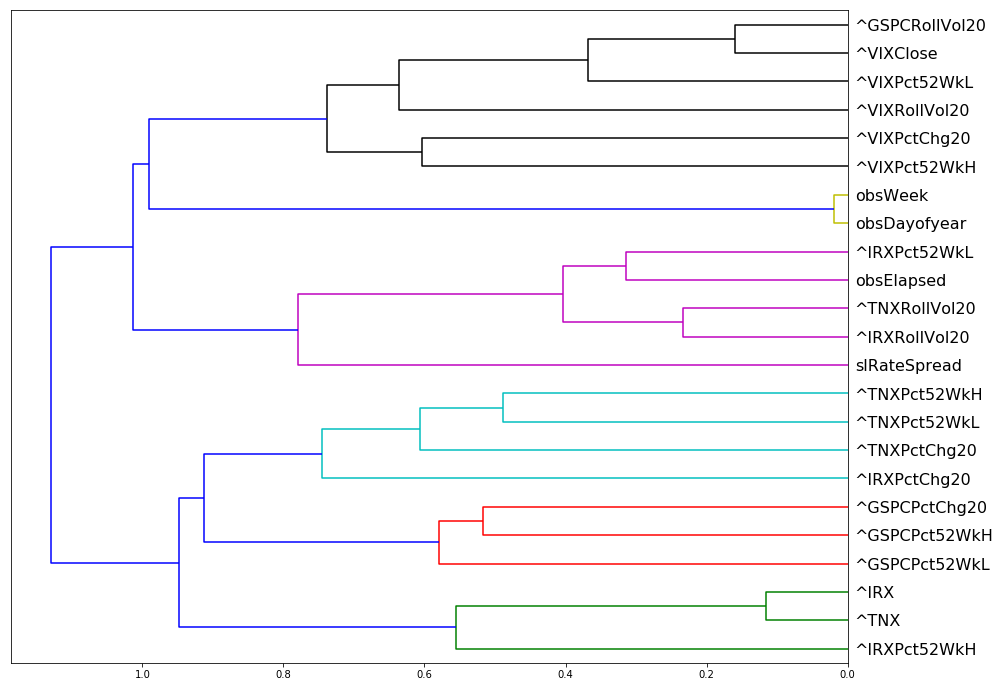

In [597]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(15,12))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [598]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [599]:
get_oob(df_keep)

0.7823985561763412

In [601]:
for c in ('^IRX','^TNX', 
          'obsWeek', 'obsDayofyear', 
         ):
    print(c, get_oob(df_keep.drop(c, axis=1)))

^IRX 0.7806815102561608
^TNX 0.7811719837015898
obsWeek 0.7771412308998534
obsDayofyear 0.7679942915463787


In [603]:
to_drop = ['^TNX', 'obsWeek',]
get_oob(df_keep.drop(to_drop, axis=1))

0.7859601335073612

In [604]:
df_keep.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df_keep, n_trn)

In [605]:
np.save('tmp/keep_cols.npy', np.array(df_keep.columns))

In [606]:
keep_cols = np.load('tmp/keep_cols.npy')
df_keep = df_trn[keep_cols]

In [607]:
reset_rf_samples()

In [608]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.00910605183878798, 0.04475311980526238, 0.958025042337665, -1.0680280617935431, 0.8479257106593419]


Partial dependence

### Visualization

In [ ]:
# show correlations with Y variables
show = ['mktFwdChg1m', 'mktFwdChg3m', 'mktFwdChg6m']
ml_ds_df.corr()[show]

In [ ]:
# series distributions
%time ml_ds_df.hist(figsize=(15,15));

In [ ]:
# scatter plots
%time pd.plotting.scatter_matrix(ml_ds_df, alpha=0.1, figsize=(40, 40));

### Discretize forward returns into classes

In [ ]:
for c in class_cols:  ml_ds_df[c] = pd.cut(
    ml_ds_df[c], cut_range, labels=fwd_ret_labels)

### Save datasets with dependent variable into S3

In [ ]:
# Split into different datasets with Y at the end, save in S3
Xs = [x for x in ml_ds_cols if x not in class_cols]
for y in class_cols:
    ds_cols = Xs + [y] # join Xs and Y
    fname = ds_name + y # dataset name
    # drop nas and shuffle the data    
    ml_ds_df_y = ml_ds_df[ds_cols].dropna().sample(frac=1)
    csv_store(ml_ds_df_y, 'training/', csv_ext.format(fname))
    print(update_fmt.format(len(ml_ds_df_y), fname))

In [ ]:
# last uploaded dataset
ml_ds_df_y.info()

In [ ]:
# get prediction record
class_cols = ['mktFwdChg1m', 'mktFwdChg3m', 'mktFwdChg6m']
record = ml_ds_df.drop(columns=class_cols).iloc[-1]
record, record.values

### Old visualizations

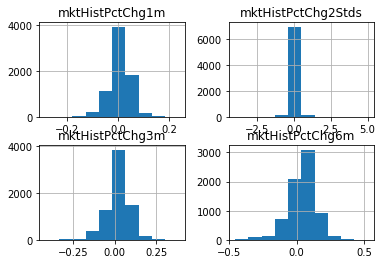

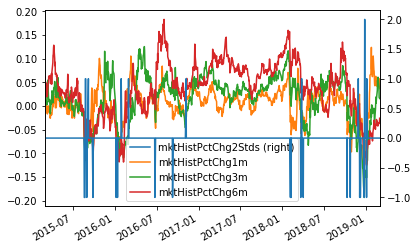

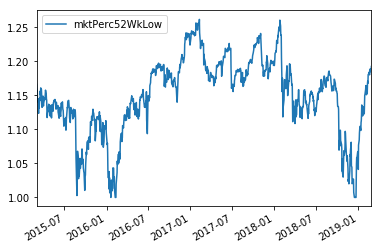

In [14]:
# historical returns for 1, 3, and 6 months
secpx['mktHistPctChgStds'] = SPY_pct_chg.apply(sign_compare, args=(SPY_pct_chg.std(),))
secpx['mktHistPctChg1m'] = SPY_close.pct_change(periods=20)
secpx['mktHistPctChg3m'] = SPY_close.pct_change(periods=60)
secpx['mktHistPctChg6m'] = SPY_close.pct_change(periods=120)
secpx['mktPerc52WkHigh'] = (SPY_close / SPY_close.rolling(252).max())
secpx['mktPerc52WkLow'] = (SPY_close / SPY_close.rolling(252).min())

show = ['mktHistPctChgStds', 'mktHistPctChg1m', 'mktHistPctChg3m', 
        'mktHistPctChg6m']
secpx[show].hist();
secpx[show].tail(252*4).plot(secondary_y='mktHistPctChgStds');
show = ['mktPerc52WkLow']
secpx[show].tail(252*4).plot();

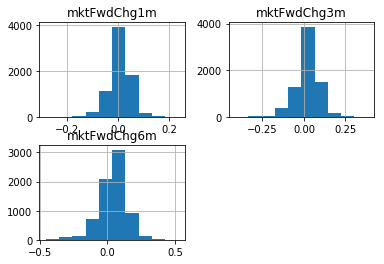

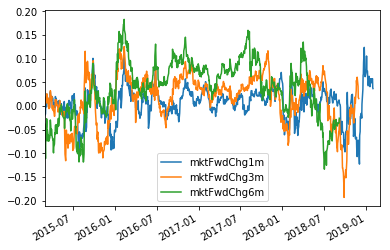

In [15]:
# Forward returns, 1w, 1m, 3m
SPY_close.pct_change(5).shift(-5)
secpx['mktFwdChg1m'] = SPY_close.pct_change(20).shift(-20)
secpx['mktFwdChg3m'] = SPY_close.pct_change(60).shift(-60)
secpx['mktFwdChg6m'] = SPY_close.pct_change(120).shift(-120)

show = ['mktFwdChg1m', 'mktFwdChg3m', 'mktFwdChg6m']
secpx[show].hist();
secpx[show].tail(252*4).plot();

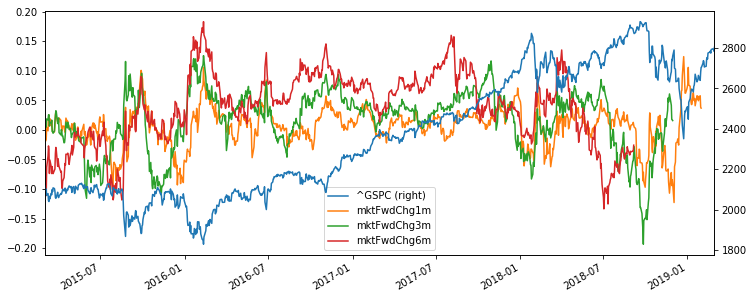

In [16]:
show = [bench_symbol, 'mktFwdChg1m', 'mktFwdChg3m', 'mktFwdChg6m']
secpx[show].tail(252*4).plot(secondary_y=bench_symbol, figsize=(12,5));

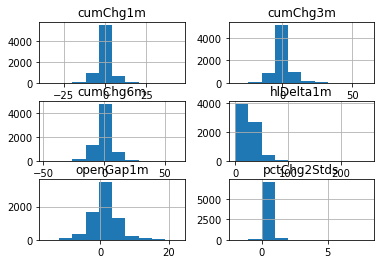

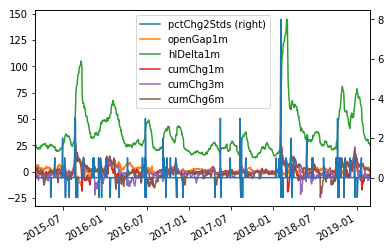

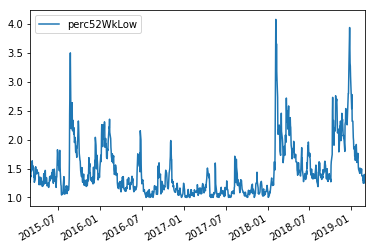

In [17]:
# cumulative deltas and gap analysis
secpx['pctChgStds'] = pct_chg.apply(sign_compare, args=(pct_chg.std(),))
secpx['openGap1m'] = (openpx - closepx.shift(1)).rolling(20).sum()
secpx['hlDelta1m'] = (highpx - lowpx).rolling(20).sum()
secpx['cumChg1m'] = (closepx - closepx.shift(1)).rolling(20).sum()
secpx['cumChg3m'] = (closepx - closepx.shift(1)).rolling(60).sum()
secpx['cumChg6m'] = (closepx - closepx.shift(1)).rolling(120).sum()
secpx['perc52WkLow'] = (closepx / closepx.rolling(252).min())

show = ['pctChgStds', 'openGap1m', 'hlDelta1m', 
        'cumChg1m', 'cumChg3m', 'cumChg6m']
secpx[show].hist();
secpx[show].tail(252*4).plot(secondary_y='pctChgStds');
show = ['perc52WkLow']
secpx[show].tail(252*4).plot();

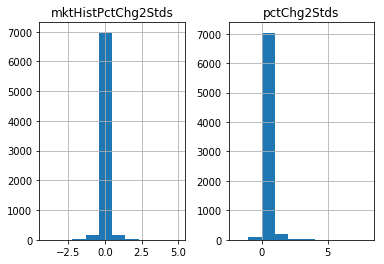

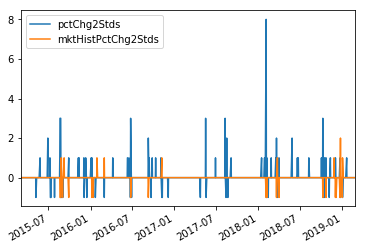

In [18]:
show = ['pctChgStds', 'mktHistPctChgStds']
secpx[show].hist();
secpx[show].tail(252*4).plot();

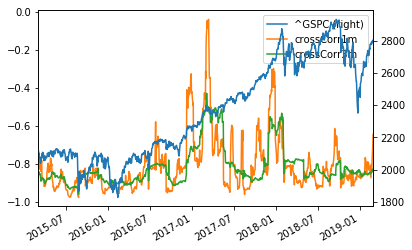

In [19]:
# rolling SPY correlations
secpx['crossCorr1m'] = closepx.pct_change().rolling(20).corr(SPY_pct_chg)
secpx['crossCorr3m'] = closepx.pct_change().rolling(60).corr(SPY_pct_chg)

show = [bench_symbol, 'crossCorr1m', 'crossCorr3m']
secpx[show].tail(252*4).plot(secondary_y=bench_symbol);
# closepx.pct_change().corr(SPY_pct_chg)

### Other code

In [227]:
ds_name = 'ds_macro_vix_'
update_fmt = 'Added {} to {} dataset'
class_cols = ['mktFwdChg1m', 'mktFwdChg3m', 'mktFwdChg6m']
cut_range = [-1, -0.1, .0, .02, .1, 1.]
fwd_ret_labels = ["bear", "short", "neutral", "long", "bull"]

In [21]:
# remove unnecessary columns
dont_show = ['high', 'open', 'low', bench_symbol]
ml_ds_cols = [x for x in secpx.columns.tolist() if x not in dont_show]
df_raw = secpx[ml_ds_cols].copy()

In [ ]:
# quick overview on statistically significnat pct moves
# pd.value_counts(secpx['pct_chg_std']).sort_index()
# secpx['pct_chg_std'][secpx['pct_chg_std'] > 15]
# secpx.loc['2018-02',:]